In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/playground-series-s4e4/sample_submission.csv
/kaggle/input/playground-series-s4e4/train.csv
/kaggle/input/playground-series-s4e4/test.csv


In [3]:
train_data = pd.read_csv('/kaggle/input/playground-series-s4e4/train.csv')


In [4]:
test_data = pd.read_csv('/kaggle/input/playground-series-s4e4/test.csv')

In [5]:
print(train_data.head())

   id Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
0   0   F   0.550     0.430   0.150        0.7715          0.3285   
1   1   F   0.630     0.490   0.145        1.1300          0.4580   
2   2   I   0.160     0.110   0.025        0.0210          0.0055   
3   3   M   0.595     0.475   0.150        0.9145          0.3755   
4   4   I   0.555     0.425   0.130        0.7820          0.3695   

   Whole weight.2  Shell weight  Rings  
0          0.1465        0.2400     11  
1          0.2765        0.3200     11  
2          0.0030        0.0050      6  
3          0.2055        0.2500     10  
4          0.1600        0.1975      9  


In [6]:
print(train_data.describe())

                 id        Length      Diameter        Height  Whole weight  \
count  90615.000000  90615.000000  90615.000000  90615.000000  90615.000000   
mean   45307.000000      0.517098      0.401679      0.135464      0.789035   
std    26158.441658      0.118217      0.098026      0.038008      0.457671   
min        0.000000      0.075000      0.055000      0.000000      0.002000   
25%    22653.500000      0.445000      0.345000      0.110000      0.419000   
50%    45307.000000      0.545000      0.425000      0.140000      0.799500   
75%    67960.500000      0.600000      0.470000      0.160000      1.067500   
max    90614.000000      0.815000      0.650000      1.130000      2.825500   

       Whole weight.1  Whole weight.2  Shell weight         Rings  
count    90615.000000    90615.000000  90615.000000  90615.000000  
mean         0.340778        0.169422      0.225898      9.696794  
std          0.204428        0.100909      0.130203      3.176221  
min          0.0

In [7]:
train_data.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64

In [8]:
train_data.duplicated().sum()

0

In [9]:
train_data = pd.get_dummies(train_data, columns=['Sex'])

In [10]:
print(train_data.head())

   id  Length  Diameter  Height  Whole weight  Whole weight.1  Whole weight.2  \
0   0   0.550     0.430   0.150        0.7715          0.3285          0.1465   
1   1   0.630     0.490   0.145        1.1300          0.4580          0.2765   
2   2   0.160     0.110   0.025        0.0210          0.0055          0.0030   
3   3   0.595     0.475   0.150        0.9145          0.3755          0.2055   
4   4   0.555     0.425   0.130        0.7820          0.3695          0.1600   

   Shell weight  Rings  Sex_F  Sex_I  Sex_M  
0        0.2400     11   True  False  False  
1        0.3200     11   True  False  False  
2        0.0050      6  False   True  False  
3        0.2500     10  False  False   True  
4        0.1975      9  False   True  False  


In [11]:
test_data = pd.get_dummies(test_data, columns=['Sex'])

In [12]:
print(test_data.head())

      id  Length  Diameter  Height  Whole weight  Whole weight.1  \
0  90615   0.645     0.475   0.155        1.2380          0.6185   
1  90616   0.580     0.460   0.160        0.9830          0.4785   
2  90617   0.560     0.420   0.140        0.8395          0.3525   
3  90618   0.570     0.490   0.145        0.8740          0.3525   
4  90619   0.415     0.325   0.110        0.3580          0.1575   

   Whole weight.2  Shell weight  Sex_F  Sex_I  Sex_M  
0          0.3125        0.3005  False  False   True  
1          0.2195        0.2750  False  False   True  
2          0.1845        0.2405  False  False   True  
3          0.1865        0.2350  False  False   True  
4          0.0670        0.1050  False   True  False  


array([[<Axes: title={'center': 'Diameter'}>,
        <Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Whole weight'}>],
       [<Axes: title={'center': 'Whole weight.1'}>,
        <Axes: title={'center': 'Whole weight.2'}>,
        <Axes: title={'center': 'Shell weight'}>],
       [<Axes: title={'center': 'Rings'}>, <Axes: >, <Axes: >]],
      dtype=object)

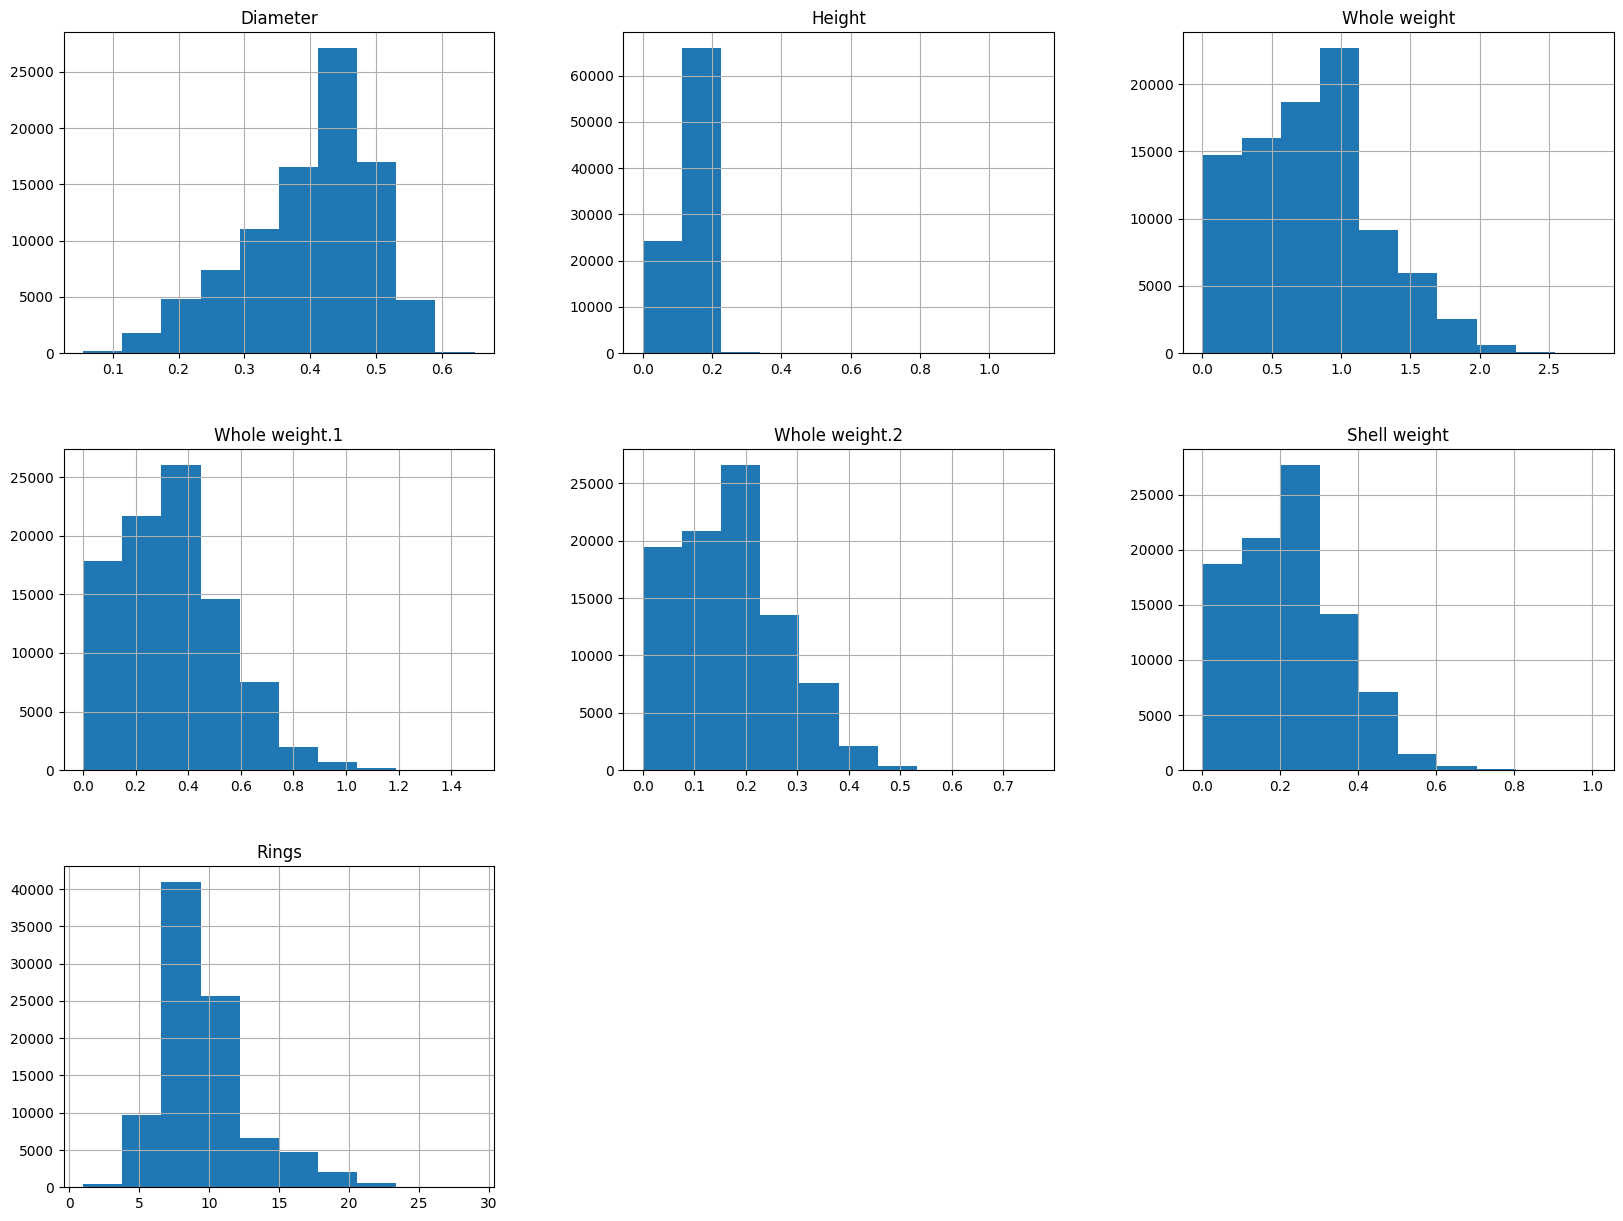

In [13]:
features = ['Diameter','Height','Whole weight','Whole weight.1','Whole weight.2','Shell weight','Rings']
train_data[features].hist(figsize=(20,15))

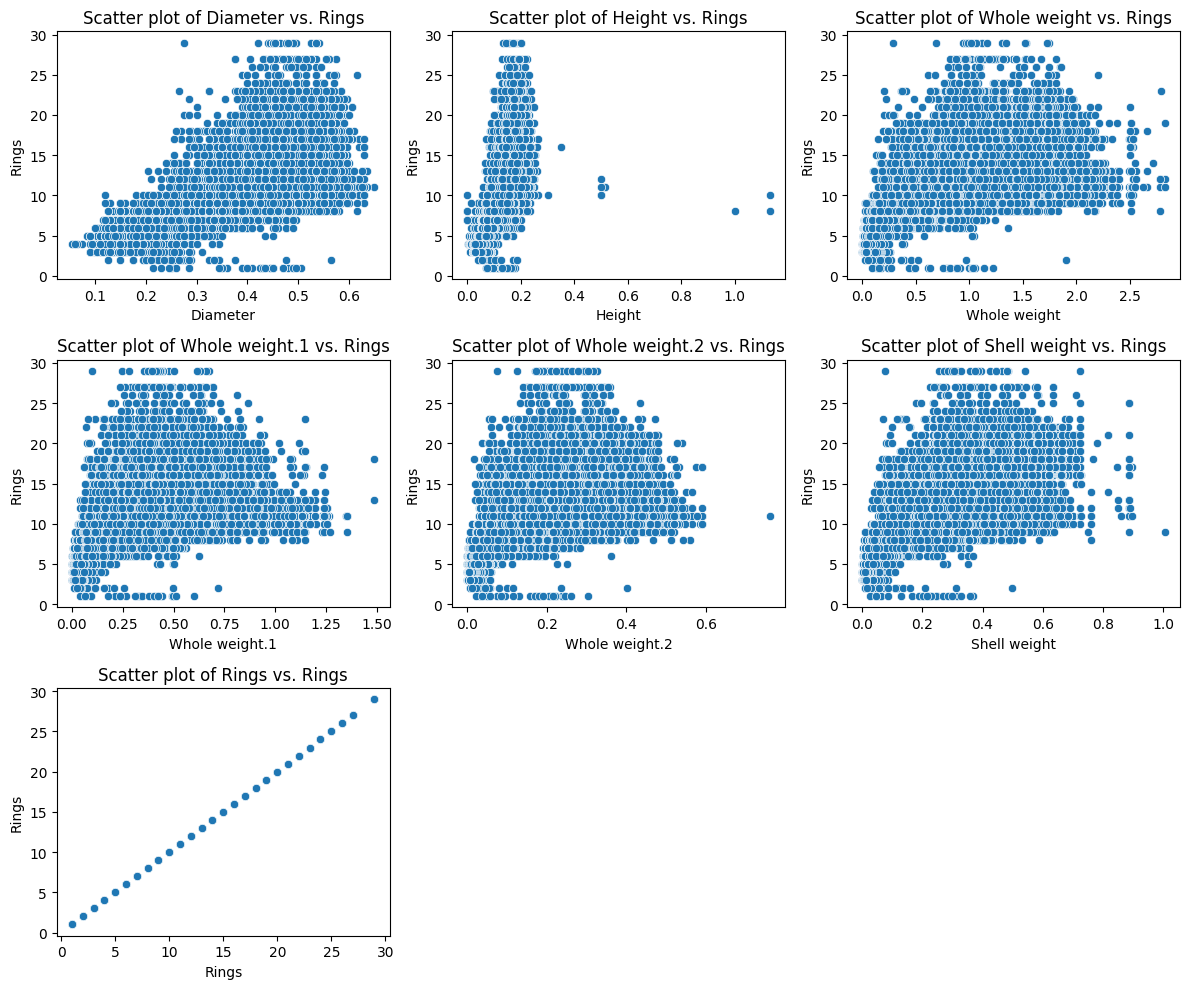

In [14]:
plt.figure(figsize=(12, 10))

# Create a scatter plot for each feature
for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)  # Create a subplot for each feature
    sns.scatterplot(x=train_data[feature], y=train_data['Rings'])
    plt.title(f'Scatter plot of {feature} vs. Rings')
    plt.xlabel(feature)
    plt.ylabel('Rings')

# Adjust the layout so that plots do not overlap
plt.tight_layout()

# Show the plot
plt.show()

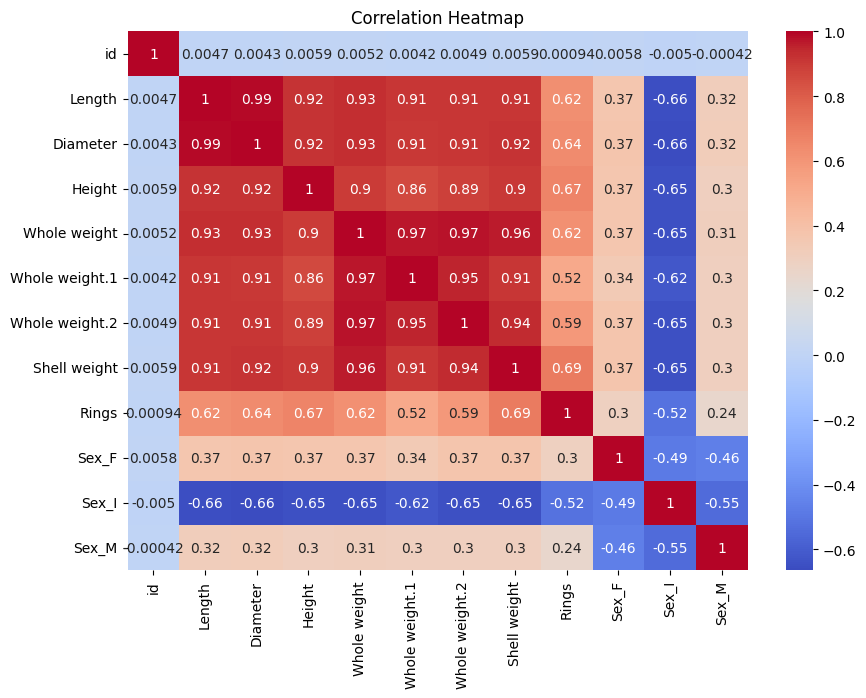

In [15]:
# Heatmap of the correlation matrix
plt.figure(figsize=(10, 7))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Droping ID column as their correlaion is very low and droping Ring column for y

In [16]:
X = train_data.drop(['id', 'Rings'], axis=1)
y = train_data['Rings']

In [17]:
X.head()

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Sex_F,Sex_I,Sex_M
0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,True,False,False
1,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,True,False,False
2,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,False,True,False
3,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,False,False,True
4,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,False,True,False


In [18]:
y.head()

0    11
1    11
2     6
3    10
4     9
Name: Rings, dtype: int64

In [19]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

Random Forest Regression

In [20]:
'''model = RandomForestRegressor(n_estimators=200,random_state=42)
model.fit(X_train, y_train)'''

model = RandomForestRegressor(
    n_estimators=200,       # Enough trees to ensure robustness
    max_depth=30,           # Prevents the trees from becoming too deep
    min_samples_split=10,   # Requires at least 10 samples to split further
    min_samples_leaf=4,     # Each leaf needs to contain at least 4 samples
    max_features='sqrt',    # Only consider a subset of features at each split
    random_state=42
)
model.fit(X_train, y_train)


RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=200, random_state=42)

In [21]:
y_pred = model.predict(X_valid)
rmsle = np.sqrt(mean_squared_log_error(y_valid, y_pred))
print(f'RMSLE: {rmsle}')

RMSLE: 0.1523132564458183


In [22]:
import xgboost as xgb

# Initialize an XGBoost regressor object with parameters
XGBmodel = xgb.XGBRegressor(
    n_estimators=200,     # The number of trees (boosting rounds)
    max_depth=10,         # Maximum tree depth for base learners
    min_child_weight=4,   # Minimum sum of instance weight (hessian) needed in a child
    colsample_bytree=0.5, # Subsample ratio of columns when constructing each tree
    subsample=0.8,        # Subsample ratio of the training instance
    learning_rate=0.1,    # Step size shrinkage used in update to prevents overfitting
    random_state=42       # Random number seed
)
XGBmodel.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [23]:
y_pred = XGBmodel.predict(X_valid)


In [24]:
rmsle = np.sqrt(mean_squared_log_error(y_valid, y_pred))
print(f'RMSLE: {rmsle}')

RMSLE: 0.15303690645668863


In [25]:
test_data_wo_id = test_data.drop(['id'], axis=1)  
predictions = model.predict(test_data_wo_id)


In [26]:
submission = pd.DataFrame({'id': test_data['id'], 'Rings': predictions})
submission.to_csv('submission.csv', index=False)
print(submission.head())

      id      Rings
0  90615  10.051396
1  90616   9.892692
2  90617  10.347814
3  90618  10.767659
4  90619   7.756115
